In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.8.2


In [12]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [14]:
train_images.shape

(60000, 28, 28)

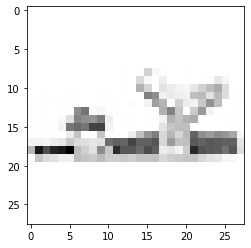

In [16]:
import matplotlib.pyplot as plt
plt.imshow(train_images[59999], cmap='Greys')

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [25]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=64, activation=tf.nn.relu))
model.add(keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3239 - accuracy: 0.7320
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6105 - accuracy: 0.7997
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5357 - accuracy: 0.8172
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4895 - accuracy: 0.8311
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4464 - accuracy: 0.8418
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4185 - accuracy: 0.8501
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4042 - accuracy: 0.8557
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3853 - accuracy: 0.8605
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3809 - accuracy: 0.8640
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.365

In [27]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4702 - accuracy: 0.8604


[0.47021591663360596, 0.8604000210762024]

In [30]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.8):
      self.model.stop_training = True

callback = myCallback()

In [32]:
model.fit(train_images, train_labels, epochs = 5, callbacks=[callback])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3075 - accuracy: 0.8895
